In [1]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
from preprocess import slice_histogram_match
from datasets import load_image
source = load_image(['LGE'])['image']

In [2]:
# histogram match
bad = sitk.ReadImage('datasets/train/all_image/patient1_LGE.nii.gz',sitk.sitkFloat32)
bad = sitk.GetArrayFromImage(bad)
test = []
for i in range(bad.shape[0]):
    test.append(bad[i])
image = sitk.ReadImage('datasets/train/match/match.nii.gz',sitk.sitkFloat32)
reference_ = sitk.GetArrayFromImage(image)[0]
after = slice_histogram_match(source=test)

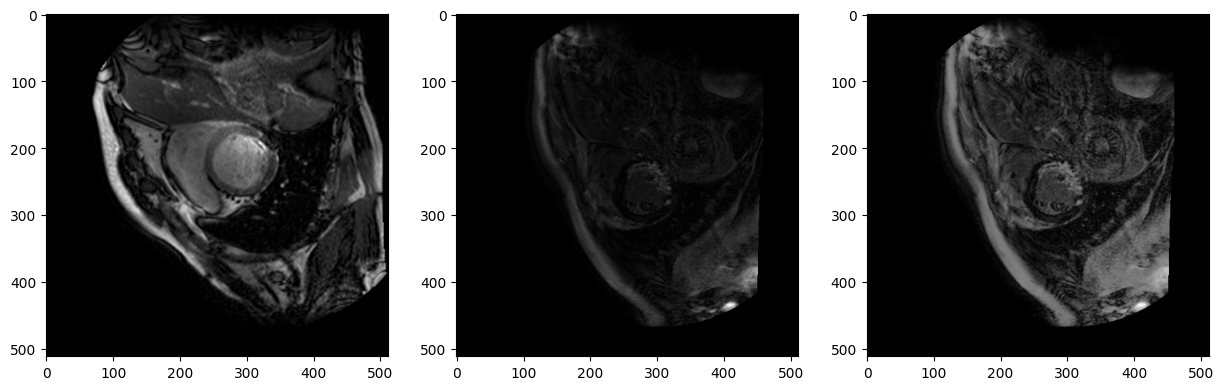

In [3]:
index = 10
plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
plt.imshow(reference_,cmap='gray')
plt.subplot(1,3,2)
plt.imshow(test[index],cmap='gray')
plt.subplot(1,3,3)
plt.imshow(after[index],cmap='gray')

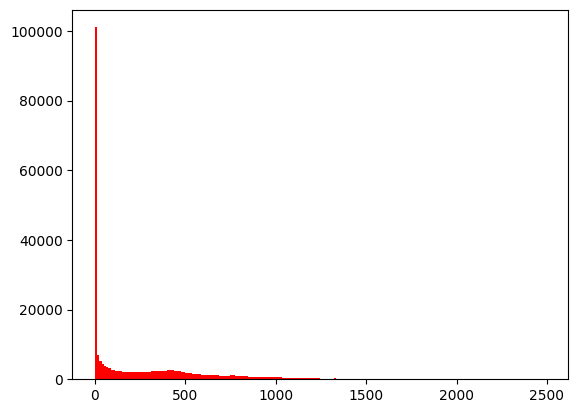

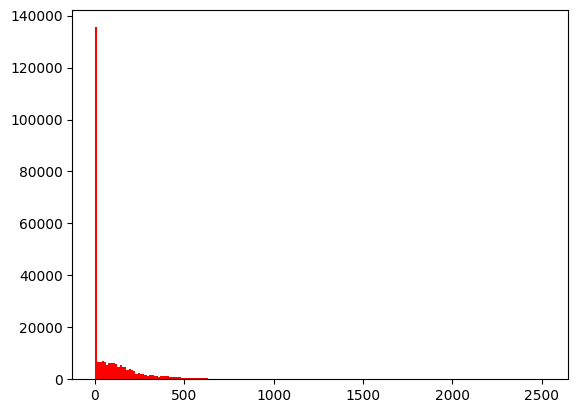

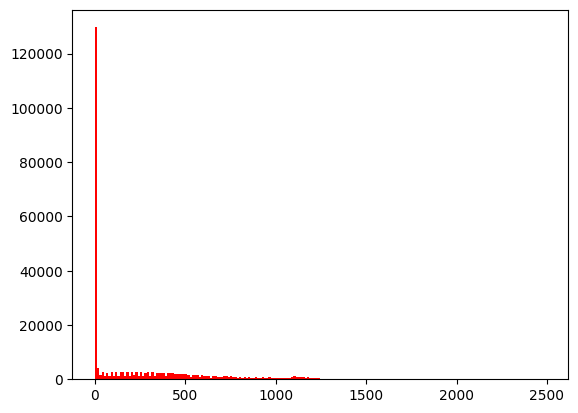

In [4]:
from utils import drawhistogram
drawhistogram(reference_)
drawhistogram(source[index])
drawhistogram(after[index])

In [75]:
# save match picture
# original an Resize to 512X512
import albumentations as A
data = A.Resize(512,512)(image=reference_)
save = data['image']
file = sitk.GetImageFromArray(np.expand_dims(save,axis=0))
sitk.WriteImage(file,'datasets/train/match/match.nii.gz')

(1, 512, 512)


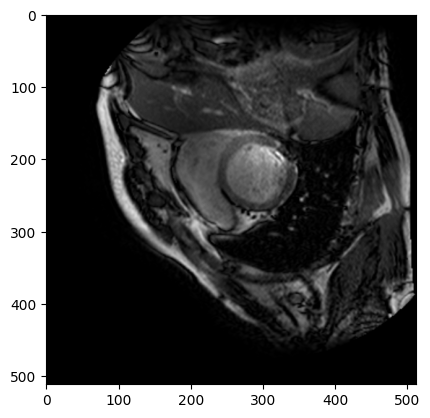

In [77]:
ii = sitk.ReadImage('datasets/train/match/match.nii.gz',sitk.sitkFloat32)
ii_ = sitk.GetArrayFromImage(ii)
plt.imshow(ii_[0],cmap='gray')
print(ii_.shape)

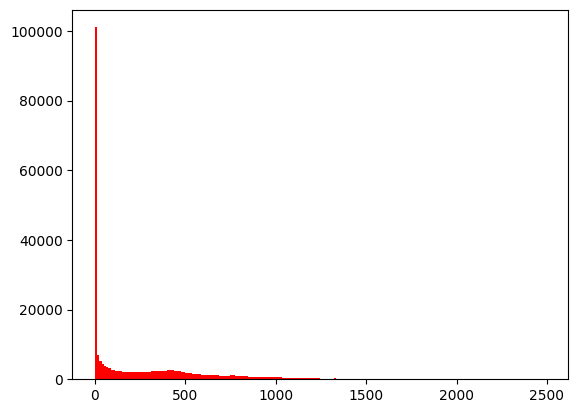

In [78]:
drawhistogram(ii_[0])